#Theoretical

**1.What is a Support Vector Machine (SVM)?**

->A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification (and also regression) tasks.
Its core idea is to find the best separating boundary called a hyperplane that divides data points of different classes with the maximum possible margin.

**2.What is the difference between Hard Margin and Soft Margin SVM?**

->*Hard Margin SVM*
1. Assumes the data is perfectly linearly separable and finds a hyperplane that separates the classes with no misclassification allowed.
2. Every data point must be outside or exactly on the margin boundary.
3. Works well if the data is noise-free and perfectly separable.
4. Very sensitive to outliers — even one misclassified point can ruin the boundary.Rarely works in real-world noisy datasets.

*Soft Margin SVM*
1. Allows some violations of the margin rule to handle noisy, overlapping, or imperfectly separable data.
2. Introduces slack variables (ξ) to permit some points to be inside the margin or even on the wrong side.
3. Uses a regularization parameter 𝐶 to control the trade-off between:
* Maximizing the margin.
* Minimizing classification errors.
4. Works well with noisy data.More robust to outliers.

**3.What is the mathematical intuition behind SVM?**

->SVM tries to maximize the margin (distance between the decision boundary and nearest points from each class).This reduces overfitting by making the boundary more robust to noise.


**4.What is the role of Lagrange Multipliers in SVM?**

->Used to solve the optimization problem with constraints.

* Transform the constrained optimization into an unconstrained dual form, making kernel trick possible.

* Helps identify support vectors directly from the solution — only those with non-zero multipliers matter.

**5.What are Support Vectors in SVM?**

->They are Data points closest to the decision boundary that determine the position and orientation of the hyperplane.Removing non-support vectors doesn’t change the boundary; removing a support vector does.

**6.What is a Support Vector Classifier (SVC)?**

->SVC is the classification implementation of SVM in libraries like scikit-learn.Supports different kernels: Linear, Polynomial, RBF, etc.

Can be used for binary and multiclass classification via OvR or OvO strategies.

**7.What is a Support Vector Regressor (SVR)?**

->It is SVM adapted for regression tasks.Instead of maximizing class margin, it tries to fit a function such that most data points lie within an epsilon margin.
Ignores small errors (within epsilon) and penalizes larger deviations.

**8.What is the Kernel Trick in SVM?**

->A mathematical shortcut to work in higher-dimensional feature spaces without explicitly computing coordinates.Allows SVM to handle non-linear decision boundaries efficiently.

Popular kernels: Linear, Polynomial, RBF, Sigmoid.

**9.Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**

->Linear: Good for linearly separable data; fast and interpretable.

Polynomial: Models more complex boundaries; degree controls complexity.

RBF (Gaussian): Flexible, works well in most non-linear cases; can overfit if gamma is too high.

**10.What is the effect of the C parameter in SVM?**

->Controls trade-off between margin width and misclassification.

High C: Less tolerance for misclassification -> narrower margin -> risk of overfitting.

Low C: More tolerance -> wider margin -> more generalization.

**11.What is the role of the Gamma parameter in RBF Kernel SVM?**

->Defines how far the influence of a single training point reaches.

Low gamma: Wide influence -> smoother decision boundary.

High gamma: Narrow influence -> more complex boundary, possible overfitting.


**12.What is the Naïve Bayes classifier, and why is it called "Naïve"?**

->Probabilistic classifier based on Bayes’ theorem with the assumption that features are independent given the class label.

“Naïve” because in real life, features are rarely completely independent — but the assumption simplifies computation and works surprisingly well.

**13.What is Bayes’ Theorem?**

->Bayes’ Theorem is a fundamental concept in probability and statistics that describes how to update the probability of a hypothesis when given new evidence.

It provides a mathematical way to revise existing beliefs (prior probabilities) in light of new data (likelihood).


**14.Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**

->Gaussian:
* Features follow a normal distribution.
* EG.(continuous data).

Multinomial:
* Works with discrete counts.
EG. (word counts in text).

Bernoulli:
* Works with binary features
EG.( word presence/absence).

**15.When should you use Gaussian Naïve Bayes over other variants?**

->When features are continuous and roughly normally distributed (e.g., height, weight, sensor readings).

**16.What are the key assumptions made by Naïve Bayes?**

->
1. Conditional independence of features.
2. All features contribute equally to the outcome.
3. Each feature follows the assumed distribution (Gaussian, multinomial, etc.).

**17.What are the advantages and disadvantages of Naïve Bayes?**

->Advantages: Fast, works with small data, handles high-dimensional data, good for text classification.

Disadvantages: Independence assumption often unrealistic, poor at capturing correlations between features.

**18.Why is Naïve Bayes a good choice for text classification?**

->Because text features (word counts) are often conditionally independent enough for it to work well.Efficient in high-dimensional spaces like vocabulary sets.

**19.Compare SVM and Naïve Bayes for classification tasks.**

->
SVM:
* Works well with complex boundaries.
*  needs careful tuning.
*  slower for very large datasets.

Naïve Bayes:
* Extremely fast,.
* works well with text and categorical data.
* less tuning.



**20.How does Laplace Smoothing help in Naïve Bayes?**

->
1. It prevents zero probabilities when a word/feature is missing in training data.
2. Adds a small constant (usually 1) to counts to ensure all probabilities are > 0.

#Practical

In [ ]:
"21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy"

# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data    # Features
y = iris.target  # Labels

# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Create and train the SVM classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy * 100:.2f}%")


SVM Classifier Accuracy: 96.67%


In [ ]:
""" 22.Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies """

# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train SVM with Linear kernel
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# 5. Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# 6. Compare accuracies
print(f"Linear Kernel Accuracy: {acc_linear * 100:.2f}%")
print(f"RBF Kernel Accuracy: {acc_rbf * 100:.2f}%")


Linear Kernel Accuracy: 97.22%
RBF Kernel Accuracy: 100.00%


In [ ]:
"""23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE)"""

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 1. Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Reshape y for scaling
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 4. Train SVR model (RBF kernel for nonlinear regression)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# 5. Make predictions
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 6. Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"SVR Mean Squared Error: {mse:.4f}")


SVR Mean Squared Error: 0.3265


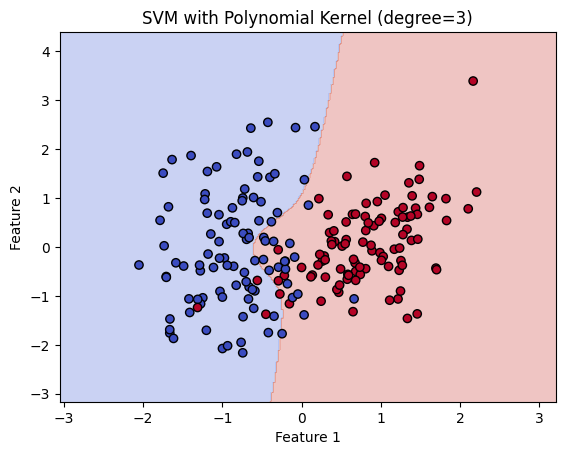

In [ ]:
"""24.Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Create a synthetic 2D dataset for visualization
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# 2. Scale features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
poly_svm.fit(X, y)

# 4. Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 5. Predict on mesh grid
Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
"""25.Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy"""

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create and train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 4. Make predictions
y_pred = gnb.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naïve Bayes Classifier Accuracy: {accuracy * 100:.2f}%")


Gaussian Naïve Bayes Classifier Accuracy: 97.37%


In [ ]:
"""26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset"""

# Import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1. Load the 20 Newsgroups dataset (subset for faster training)
categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
)

# 3. Convert text to term-frequency matrix
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# 4. Create and train Multinomial Naïve Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

# 5. Make predictions
y_pred = mnb.predict(X_test_counts)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naïve Bayes Classifier Accuracy: {accuracy * 100:.2f}%")

# Optional: Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Multinomial Naïve Bayes Classifier Accuracy: 89.22%

Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.92      0.88      0.90       220
   rec.sport.baseball       0.86      0.92      0.89       178
            sci.space       0.89      0.84      0.87       189
talk.politics.mideast       0.89      0.94      0.91       192

             accuracy                           0.89       779
            macro avg       0.89      0.89      0.89       779
         weighted avg       0.89      0.89      0.89       779



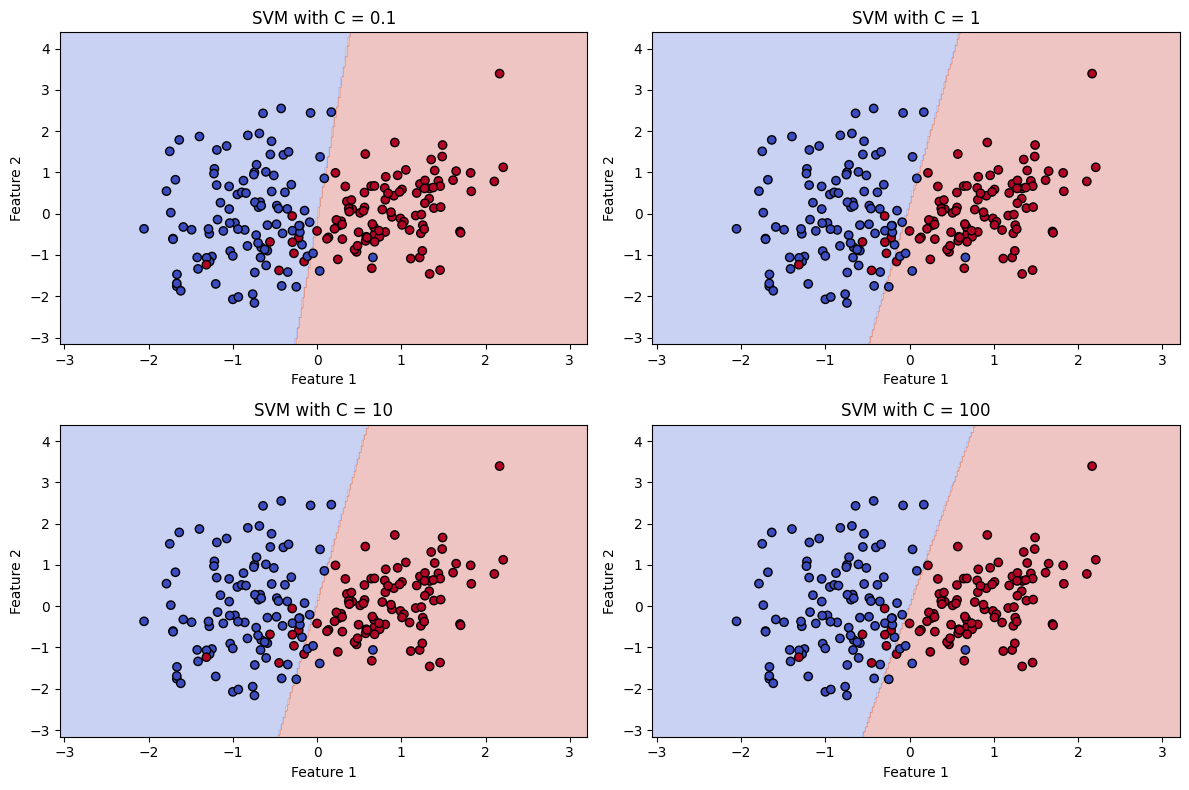

In [ ]:
"""27.Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Create a synthetic 2D dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# 2. Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Different C values to try
C_values = [0.1, 1, 10, 100]

# 4. Plot decision boundaries for each C value
plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values, 1):
    # Train SVM with linear kernel for visualization
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X, y)

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Predict on grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM with C = {C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [ ]:
"""28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features"""

# Import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a synthetic binary feature dataset
#    make_classification generates continuous values, so we'll binarize them
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=5, n_redundant=0,
    n_classes=2, random_state=42
)

# Convert features to binary (0/1) using threshold
X_binary = (X > 0).astype(int)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y, test_size=0.2, random_state=42
)

# 3. Create and train Bernoulli Naïve Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 4. Make predictions
y_pred = bnb.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naïve Bayes Classifier Accuracy: {accuracy * 100:.2f}%")

# 6. Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Bernoulli Naïve Bayes Classifier Accuracy: 88.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.86      0.92      0.89        52

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
"""29.Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data"""

# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_wine()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Without Scaling
# ---------------------------
svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# ---------------------------
# With Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# ---------------------------
# Compare Results
# ---------------------------
print(f"SVM Accuracy without Scaling: {acc_unscaled * 100:.2f}%")
print(f"SVM Accuracy with Scaling:    {acc_scaled * 100:.2f}%")


SVM Accuracy without Scaling: 80.56%
SVM Accuracy with Scaling:    100.00%


In [ ]:
"""30.Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing"""

# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# Without Laplace Smoothing
# (using default var_smoothing)
# ----------------------------
gnb_default = GaussianNB(var_smoothing=1e-9)
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# ----------------------------
# With Laplace Smoothing
# (increase var_smoothing)
# ----------------------------
gnb_smoothed = GaussianNB(var_smoothing=1e-6)  # Larger smoothing
gnb_smoothed.fit(X_train, y_train)
y_pred_smoothed = gnb_smoothed.predict(X_test)
acc_smoothed = accuracy_score(y_test, y_pred_smoothed)

# ----------------------------
# Compare Results
# ----------------------------
print("Predictions without Laplace Smoothing:", y_pred_default)
print("Predictions with Laplace Smoothing:   ", y_pred_smoothed)
print(f"\nAccuracy without smoothing: {acc_default * 100:.2f}%")
print(f"Accuracy with smoothing:    {acc_smoothed * 100:.2f}%")


Predictions without Laplace Smoothing: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predictions with Laplace Smoothing:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Accuracy without smoothing: 100.00%
Accuracy with smoothing:    100.00%


In [ ]:
"""31.Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel)"""

# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# 4. Create SVM model
svc = SVC()

# 5. Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    svc, param_grid, refit=True, cv=5, verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 6. Print the best parameters and best score from GridSearch
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Best Cross-validation Score: {grid_search.best_score_ * 100:.2f}%")

# 7. Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from GridSearchCV: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-validation Score: 95.83%
Test Set Accuracy: 100.00%


In [ ]:
"""32.Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy"""

# Import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    n_classes=2, weights=[0.9, 0.1], random_state=42
)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train SVM without class weighting
svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# 4. Train SVM with class weighting
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# 5. Compare results
print("Without Class Weighting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_weight) * 100:.2f}%")
print(classification_report(y_test, y_pred_no_weight))

print("\nWith Class Weighting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted) * 100:.2f}%")
print(classification_report(y_test, y_pred_weighted))


Without Class Weighting:
Accuracy: 96.00%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       176
           1       1.00      0.67      0.80        24

    accuracy                           0.96       200
   macro avg       0.98      0.83      0.89       200
weighted avg       0.96      0.96      0.96       200


With Class Weighting:
Accuracy: 93.00%
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       176
           1       0.67      0.83      0.74        24

    accuracy                           0.93       200
   macro avg       0.82      0.89      0.85       200
weighted avg       0.94      0.93      0.93       200



In [ ]:
"""33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data"""

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
# Download from: https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# 2. Encode labels (ham = 0, spam = 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)

# 4. Text vectorization (Bag of Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 6. Predictions
y_pred = model.predict(X_test_vec)

# 7. Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 99.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
 [[966   0]
 [  9 140]]


In [ ]:
"""34.Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy"""

# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

# 5. Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# 6. Accuracy comparison
svm_acc = accuracy_score(y_test, svm_pred)
nb_acc = accuracy_score(y_test, nb_pred)

print(f"SVM Accuracy: {svm_acc * 100:.2f}%")
print(f"Naïve Bayes Accuracy: {nb_acc * 100:.2f}%")

if svm_acc > nb_acc:
    print(" SVM performed better.")
elif nb_acc > svm_acc:
    print(" Naïve Bayes performed better.")
else:
    print(" Both performed equally well.")


SVM Accuracy: 100.00%
Naïve Bayes Accuracy: 100.00%
 Both performed equally well.


In [ ]:
"""35.Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results"""

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Naïve Bayes on all features
nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# 4. Feature selection (Select top 10 features)
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 5. Train Naïve Bayes on selected features
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# 6. Compare results
print(f"Accuracy with all features: {acc_all * 100:.2f}%")
print(f"Accuracy with selected features: {acc_selected * 100:.2f}%")

if acc_selected > acc_all:
    print(" Feature selection improved performance.")
elif acc_selected < acc_all:
    print("Feature selection reduced performance.")
else:
    print(" Performance remained the same.")


Accuracy with all features: 97.37%
Accuracy with selected features: 95.61%
Feature selection reduced performance.


In [ ]:
"""36.Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy="""

# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_wine()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. SVM with One-vs-Rest (OvR)
ovr_model = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# 4. SVM with One-vs-One (OvO)
ovo_model = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# 5. Compare results
print(f"Accuracy with One-vs-Rest (OvR): {acc_ovr * 100:.2f}%")
print(f"Accuracy with One-vs-One (OvO): {acc_ovo * 100:.2f}%")

if acc_ovo > acc_ovr:
    print(" OvO performed better.")
elif acc_ovr > acc_ovo:
    print(" OvR performed better.")
else:
    print(" Both performed equally well.")


Accuracy with One-vs-Rest (OvR): 100.00%
Accuracy with One-vs-One (OvO): 100.00%
 Both performed equally well.


In [ ]:
"""37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy"""

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

# 4. Train and evaluate models
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    print(f"SVM ({kernel} kernel) Accuracy: {acc * 100:.2f}%")

# 5. Find the best kernel
best_kernel = max(accuracies, key=accuracies.get)
print(f"\n  Best Performing Kernel: {best_kernel} with {accuracies[best_kernel]*100:.2f}% accuracy")


SVM (linear kernel) Accuracy: 95.61%
SVM (poly kernel) Accuracy: 94.74%
SVM (rbf kernel) Accuracy: 94.74%

  Best Performing Kernel: linear with 95.61% accuracy


In [ ]:
"""38.Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy"""

# Import libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Load dataset
data = load_iris()
X = data.data
y = data.target

# 2. Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Initialize accuracy list
accuracies = []

# 4. Perform Stratified K-Fold CV
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train SVM
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Compute average accuracy
avg_accuracy = np.mean(accuracies)

# 6. Display results
print("Fold Accuracies:", [f"{a*100:.2f}%" for a in accuracies])
print(f"Average Accuracy: {avg_accuracy*100:.2f}%")


Fold Accuracies: ['100.00%', '100.00%', '93.33%', '100.00%', '100.00%']
Average Accuracy: 98.67%


In [ ]:
"""39.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance"""

# Import libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_iris()
X, y = data.data, data.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Define different priors (must sum to 1)
priors_list = [
    None,  # Let the model learn priors from data
    [0.33, 0.33, 0.34],  # Equal class priors
    [0.2, 0.3, 0.5],     # Skewed priors
    [0.5, 0.3, 0.2]      # Another skewed version
]

# 4. Train models and compare accuracy
print("Comparing Naïve Bayes with Different Priors:")
for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors} -> Accuracy: {acc*100:.2f}%")


Comparing Naïve Bayes with Different Priors:
Priors: None -> Accuracy: 91.11%
Priors: [0.33, 0.33, 0.34] -> Accuracy: 91.11%
Priors: [0.2, 0.3, 0.5] -> Accuracy: 91.11%
Priors: [0.5, 0.3, 0.2] -> Accuracy: 91.11%


In [ ]:
"""40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy"""

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train baseline SVM without feature selection
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

# 4. Apply RFE for feature selection (keep top 10 features)
rfe = RFE(estimator=SVC(kernel="linear", random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Transform datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# 5. Train SVM with selected features
svm_rfe_clf = SVC(kernel="linear", random_state=42)
svm_rfe_clf.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe_clf.predict(X_test_rfe)
rfe_acc = accuracy_score(y_test, y_pred_rfe)

# 6. Compare results
print("SVM Accuracy without RFE: {:.2f}%".format(baseline_acc * 100))
print("SVM Accuracy with RFE (10 features): {:.2f}%".format(rfe_acc * 100))
print("\nSelected Feature Indices:", [i for i, selected in enumerate(rfe.support_) if selected])


SVM Accuracy without RFE: 95.32%
SVM Accuracy with RFE (10 features): 95.91%

Selected Feature Indices: [0, 6, 10, 11, 20, 24, 25, 26, 27, 28]


In [ ]:
"""41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy"""

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train SVM Classifier
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train, y_train)

# 4. Predictions
y_pred = svm_clf.predict(X_test)

# 5. Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Print results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))


Precision: 0.94
Recall: 0.99
F1-Score: 0.96

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
"""42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss)"""

# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# 1. Load dataset
data = load_iris()
X, y = data.data, data.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Gaussian Naïve Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# 4. Predict probabilities (needed for log loss)
y_proba = nb_clf.predict_proba(X_test)

# 5. Compute Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_proba)

# 6. Print results
print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.2348


Accuracy: 1.00


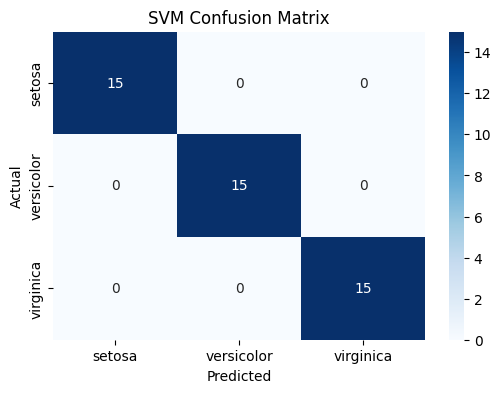

In [ ]:
"""43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn"""

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load dataset
data = load_iris()
X, y = data.data, data.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# 4. Predictions
y_pred = svm_clf.predict(X_test)

# 5. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Plot Confusion Matrix with Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [ ]:
"""44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE"""

# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# 1. Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 3. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# 4. Train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# 5. Predictions
y_pred_scaled = svr.predict(X_test)

# 6. Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 7. Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 0.37


In [ ]:
"""45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score"""

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# 1. Load dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize Gaussian Naïve Bayes model
nb = GaussianNB()

# 4. Train the model
nb.fit(X_train, y_train)

# 5. Predict probabilities (needed for ROC-AUC)
y_proba = nb.predict_proba(X_test)[:, 1]  # probability for positive class

# 6. Evaluate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9984


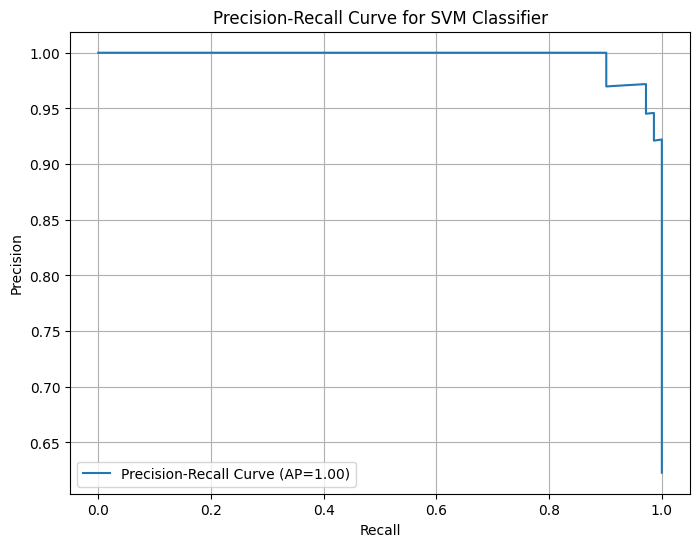

In [ ]:
"""46.Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve"""

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Load dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize SVM with probability estimates
svm = SVC(kernel='rbf', probability=True, random_state=42)

# 4. Train the model
svm.fit(X_train, y_train)

# 5. Predict probabilities for the positive class
y_scores = svm.predict_proba(X_test)[:, 1]

# 6. Compute Precision, Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# 7. Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP={avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()
